# 110. Malware Detection - binary classification

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/malware.csv", index_col= 0) # index_col=0 첫번째를 인덱스 칼럼으로 써라
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
65416,VirusShare_3ede9b62781398a2e39a0f6af9356a54,3ede9b62781398a2e39a0f6af9356a54,332,224,258,10,0,117760,392192,0,...,5,3.425849,2.458492,4.035538,3146.400000,48,9640,72,15,0
23220,fxsocm.dll,9a0959a682d8eba06d0bd181c49ee2a8,332,224,8462,7,10,112640,29696,0,...,8,3.911994,2.669737,5.335373,1222.750000,164,4889,72,16,1
118017,VirusShare_abe7101746242c922a539ba461db4e38,abe7101746242c922a539ba461db4e38,332,224,258,10,0,119808,385024,0,...,6,3.776760,2.458492,5.317552,2740.166667,48,9640,72,15,0
69842,VirusShare_64a1247fc96d5bc2994ef89ca09adee8,64a1247fc96d5bc2994ef89ca09adee8,332,224,258,10,0,120320,385024,0,...,6,3.756068,2.458492,5.317552,2739.500000,48,9640,72,15,0
22165,asferror.dll,ebc23440aa9cc4f08241d35147c1d5b5,332,224,8462,7,10,0,7168,0,...,2,3.488703,3.471506,3.505901,3050.000000,888,5212,0,16,1


In [4]:
df.shape

(10000, 57)

In [5]:
df['legitimate'].value_counts() # 정답 데이터 칼럼

,count
legitimate,
0,7071
1,2929


In [6]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

- Name : 제외
- md5 : hash value 제외
--> 수치 데이터가 아님!!

In [7]:
df = df.iloc[:, 2:] # 인덱스를 사용해서 슬라이싱, name,md5를 슬라이싱하기 위해서
df.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
65416,332,224,258,10,0,117760,392192,0,58906,4096,...,5,3.425849,2.458492,4.035538,3146.400000,48,9640,72,15,0
23220,332,224,8462,7,10,112640,29696,0,108806,4096,...,8,3.911994,2.669737,5.335373,1222.750000,164,4889,72,16,1
118017,332,224,258,10,0,119808,385024,0,61532,4096,...,6,3.776760,2.458492,5.317552,2740.166667,48,9640,72,15,0
69842,332,224,258,10,0,120320,385024,0,61562,4096,...,6,3.756068,2.458492,5.317552,2739.500000,48,9640,72,15,0
22165,332,224,8462,7,10,0,7168,0,0,4096,...,2,3.488703,3.471506,3.505901,3050.000000,888,5212,0,16,1


In [8]:
df.shape

(10000, 55)

In [9]:
# 데이터프레임에서 정답 레이블을 pop해주기
y = df.pop('legitimate').values # .values를 해주면 값이 저장됨(numpy형태), values를 안해주면 Series 형태로 빠짐
X = df.values
X.shape, y.shape

((10000, 54), (10000,))

# 데이터셋 분할

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 54), (2000, 54), (8000,), (2000,))

# 스케일링

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

# 모델 생성

In [12]:
model = tf.keras.Sequential()# 위에서 import를 안하면 여기서 불러도됨

model.add(Dense(32, input_shape=(54,), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # 로지스틱 회귀이기에 마지막에 레이어가 1개이고, 활성화 함수가 시그모이드!!

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

# 컴파일

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"]) # 이진 분류일때 손실함수는 binary_crossentropy

# 모델 학습

In [14]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9054 - loss: 0.3357 - val_accuracy: 0.9820 - val_loss: 0.0567
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9816 - loss: 0.0536 - val_accuracy: 0.9860 - val_loss: 0.0442
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0408 - val_accuracy: 0.9855 - val_loss: 0.0432
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0434 - val_accuracy: 0.9870 - val_loss: 0.0378
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0341 - val_accuracy: 0.9870 - val_loss: 0.0398
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0345 - val_accuracy: 0.9895 - val_loss: 0.0402
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0318 - val_accuracy: 0.9905 - val_loss: 0.0378
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0270 - val_accuracy: 0.

In [16]:
score = model.evaluate(X_test, y_test, verbose=0) # 마지막의 학습 결과를 출력 [손실,정확도]


print(model.metrics_names)
print("Test score : {:.2f}".format(score[0]))
print("Test accuracy : {:.2f}".format(score[1]))

['loss', 'compile_metrics']
Test score : 0.04
Test accuracy : 0.99


# 시각화

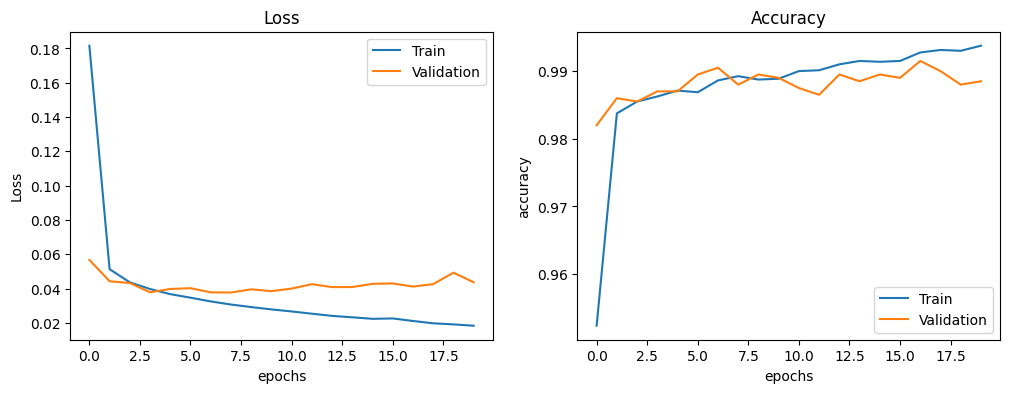

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # row 1개, column 2개로 그릴건데, 그 중 첫 번째
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Validation")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")

plt.legend()

plt.subplot(1,2,2) # row 1개, column 2개로 그릴건데, 그 중 첫 번째
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.legend()

# accuracy_score

In [20]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test) > 0.5 # 0.5보다 크면 1으로 간주, 작으면 0으로 간주, 그냥 y_pred을 출력하면 확률값으로 나옴
accuracy_score(y_test, y_pred)# 실제값(y_test)와 예측값(y_pred)간의 정확도 계산 // 0.9905

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9885